# Spark Funds Investment Assignment

Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns
warnings.filterwarnings('ignore')

# Checkpoint 1: Data Cleaning 1

# Data Understanding

Loading Companies dataframe

In [3]:
companies = pd.read_csv("companies.csv", encoding='palmos')

In [4]:
#Taking a glance at companies data
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
#check for shape of data
companies.shape

(66368, 10)

In [6]:
#checking columns of data
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [7]:
#Check data type each columns
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


Here "permalink" colmn contains uniques ID for each company name. Now we will check unique values in "Permalink" column.

In [8]:
#Converting all the elements in columns to upper case to avoid any duplicate values
companies['permalink'] = companies['permalink'].str.upper()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
companies['permalink'].nunique()

66368

Loading Rounds2 Dataframe

In [10]:
rounds2 = pd.read_csv('rounds2.csv', encoding='palmos')

In [11]:
#checking head for rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
#check shape of rounds2
rounds2.shape

(114949, 6)

In [13]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


Here in rounds 2 column "company_permalink" seems as same as "permalink" column in companies dataframe.Lets check unique values for the same

In [14]:
#Converting all the elements in columns to upper case to avoid any duplicate values
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

In [15]:
rounds2.company_permalink.nunique()

66368

Now to check if there are any companies present in rounds2 which are not present in companies file.

In [16]:
rounds2[~rounds2['company_permalink'].str.upper().isin(companies['permalink'].str.upper())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


As per above result there are no such companies present in rounds2 file which are not in companies file.

Now as per observations we merge two files on common column "permalink"

In [17]:
#Merging two dataframes
master_frame = pd.merge(rounds2, companies, how="inner", left_on="company_permalink", right_on="permalink")


In [18]:
#check merged dataframe
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [19]:
#Dropping extra column "permalink"
master_frame = master_frame.drop(['permalink'],axis = 1)

In [20]:
#checking number of rows and columns in master_frame
master_frame.shape

(114949, 15)

# Missing values treatment

In [21]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [22]:
#checking percentage of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

Here in abouve result we can see the percentage of missing values for each column present in master_frame.
1. As per observation our required column for further analysis which are having missing values are "raised_amount_usd","category_list" and "country_code" .
2. Column "raised_amount_usd" having 17% mising values but as its our main column based on which our investment decisions will be made so we should not drop or impute that much missing missing values as it will likesly to disturbe our end result.
3. For columns "country_code" and "category_list" have missing values less than 10% we will drop these values as numbers are less.
4. For other columns having missing values,these columns will not play such important role in our further analysis so we will not treat its missing values. 

In [23]:
#dropping missing values for 'country_code' column.
master_frame = master_frame[~pd.isnull(master_frame["country_code"])]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         76684
funded_at                      0
raised_amount_usd          17163
name                           1
homepage_url                4552
category_list               1739
status                         0
country_code                   0
state_code                  2268
region                      1489
city                        1486
founded_at                 16808
dtype: int64

In [24]:
##dropping missing values for 'ategory_list' column.
master_frame = master_frame[~pd.isnull(master_frame["category_list"])]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd          16003
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
dtype: int64

# Checkpoint 2: Funding Type Analysis

Selection of Investment Type from Seed, Angel, Venture and Private Equity based on investment amount in range of 5 to 15 milion USD.

Checking outliars in "raised_amount_usd" column.

In [25]:
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

As per above observation we can say that there are outliers present, there is large difference between 25% and min also between 75% and max. Thus we take median as a reprensentative for investment type.

In [26]:
#checking median for each investment type
master_frame.groupby('funding_round_type')['raised_amount_usd'].median()

funding_round_type
angel                      414906.0
convertible_note           300000.0
debt_financing            1096653.0
equity_crowdfunding         85000.0
grant                      225000.0
non_equity_assistance       60000.0
post_ipo_debt            19900000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       211500.0
secondary_market         45850000.0
seed                       300000.0
undisclosed               1100000.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64

Here in above result we can say that Venture type will be most suitable for Sparks Funds as its value in 5 to 15 million.

Now we will create sub dataframe for venture type only.

In [27]:
venture_df = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]

In [28]:
venture_df.shape

(52024, 15)

In [29]:
venture_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


# Checkpoint 3: Country Analysis

As we know the best investment type for Sparks Funds, now lets find out top 9 best countries with highest total fundings having venture investment type.

In [30]:
top9 = venture_df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).reset_index().head(9)

In [31]:
#check top9 dataframe
top9

,country_code,raised_amount_usd
0,USA,4.200680e+11
1,CHN,3.933892e+10
2,GBR,2.007281e+10
3,IND,1.426151e+10
4,CAN,9.482218e+09
5,FRA,7.226851e+09
6,ISR,6.854350e+09
7,DEU,6.306922e+09
8,JPN,3.167647e+09


From above result we can conclude that top 3 english speaking countries are:
1. USA - United States of America
2. GBR - United Kingdom
3. IND - India

# Checkpoint 4: Sector Analysis 1

Now for sector analysis we need to extract Primary sector from category_list column and mapp it to one of eight main sector present in mapping file.

In [32]:
#Extracting Primary sector
master_frame['Primay_Sector'] = master_frame['category_list'].apply(lambda x : x.split("|")[0])

In [33]:
#checking master frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primay_Sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


In [34]:
master_frame.shape

(104532, 16)

Reading mapping.csv

In [35]:
mapping = pd.read_csv('mapping.csv')

In [36]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [37]:
mapping.shape

(688, 10)

In [38]:
#checking missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [39]:
#dropping missing value
mapping = mapping[~pd.isnull(mapping["category_list"])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [40]:
#dropping blanks column as its not one of our main sectors.
mapping = mapping.drop(columns = 'Blanks')

In [41]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [42]:
#Merging Master Frame with Mapping data frame
final_df = pd.merge(master_frame, mapping, how="inner", left_on="Primay_Sector", right_on="category_list")
final_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,...,Primay_Sector,category_list_y,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,...,Media,Media,0,0,1,0,0,0,0,0
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,Media,0,0,1,0,0,0,0,0
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,Media,0,0,1,0,0,0,0,0
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,...,Media,Media,0,0,1,0,0,0,0,0
4,/ORGANIZATION/A-B-PRODUCTIONS,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,A.B Productions,NaN,Media|Music|News,operating,...,Media,Media,0,0,1,0,0,0,0,0


In [43]:
final_df.shape

(96812, 25)

Now we need to map each primary sector to its corresponding main sector. For that we will use Pandas melt funtion.

In [44]:
#storing values variables in value_vars variable
value_vars = list(final_df.columns[-8:])

In [45]:
value_vars

['Automotive & Sports',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [46]:
#storing id variables in id_vars
id_vars = list(np.setdiff1d(final_df.columns, value_vars))

In [47]:
id_vars

['Primay_Sector',
 'category_list_x',
 'category_list_y',
 'city',
 'company_permalink',
 'country_code',
 'founded_at',
 'funded_at',
 'funding_round_code',
 'funding_round_permalink',
 'funding_round_type',
 'homepage_url',
 'name',
 'raised_amount_usd',
 'region',
 'state_code',
 'status']

In [48]:
#Using melt function
final_df = pd.melt(final_df, id_vars = id_vars, value_vars = value_vars)

In [49]:
final_df.head()

,Primay_Sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,variable,value
0,Media,Media,Media,Mumbai,/ORGANIZATION/-FAME,IND,NaN,05-01-2015,B,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,http://livfame.com,#fame,10000000.0,Mumbai,16,operating,Automotive & Sports,0
1,Media,Media|News|Publishing|Soccer|Sports,Media,London,/ORGANIZATION/90MIN,GBR,01-01-2011,06-10-2015,NaN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,http://www.90min.com,90min,15000000.0,London,H9,operating,Automotive & Sports,0
2,Media,Media|News|Publishing|Soccer|Sports,Media,London,/ORGANIZATION/90MIN,GBR,01-01-2011,07-05-2013,NaN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,http://www.90min.com,90min,5800000.0,London,H9,operating,Automotive & Sports,0
3,Media,Media|News|Publishing|Soccer|Sports,Media,London,/ORGANIZATION/90MIN,GBR,01-01-2011,26-03-2014,NaN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,http://www.90min.com,90min,18000000.0,London,H9,operating,Automotive & Sports,0
4,Media,Media|Music|News,Media,Los Angeles,/ORGANIZATION/A-B-PRODUCTIONS,USA,11-12-2012,21-01-2014,NaN,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,A.B Productions,NaN,Los Angeles,CA,operating,Automotive & Sports,0


In [50]:
#Dropping rows where value =0
final_df = final_df[final_df['value']==1]
final_df= final_df.drop('value', axis=1)

In [51]:
final_df

,Primay_Sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,variable
49631,Sports,Sports,Sports,Vinding,/ORGANIZATION/12-STAR-SURVIVAL,DNK,17-07-2013,17-10-2013,NaN,/funding-round/9c08e07cfd6bdacade795671e09b86e6,equity_crowdfunding,http://www.12starsurvival.com,12 Star Survival,NaN,DNK - Other,21,operating,Automotive & Sports
49632,Sports,Sports,Sports,Chicago,/ORGANIZATION/120-SPORTS,USA,01-01-2013,20-02-2014,NaN,/funding-round/55642880265ba4cc73eda4abcac4f8da,undisclosed,http://www.120sports.com,120 Sports,NaN,Chicago,IL,operating,Automotive & Sports
49633,Sports,Sports,Sports,Rockledge,/ORGANIZATION/24-HOUR-PRO-MUSCLE-GYM,USA,15-07-2014,23-10-2014,NaN,/funding-round/5af77fb3e30fdfdcbeb465f6e6fe6204,equity_crowdfunding,http://24hourpromusclegym.com,24 Hour Pro Muscle Gym,NaN,Florida's Space Coast,FL,operating,Automotive & Sports
49634,Sports,Sports,Sports,Johnston,/ORGANIZATION/5-STAR-QUARTERBACK,USA,01-08-2011,08-09-2011,NaN,/funding-round/a3ba7f72162fd85ac4558bfc1bbdaaf5,equity_crowdfunding,http://www.5starquarterback.com,5 Star Quarterback,NaN,Providence,RI,operating,Automotive & Sports
49635,Sports,Sports|Technology,Sports,NaN,/ORGANIZATION/8PACKS,SGP,02-02-2014,01-03-2014,NaN,/funding-round/07f2f27f3185af9ec625af06fa77e3cb,seed,http://www.8packs.com,8packs,39473.0,NaN,NaN,operating,Automotive & Sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774480,Social Buying,Social Buying|Social Media,Social Buying,Santa Monica,/ORGANIZATION/THISNEXT,USA,01-12-2005,01-01-2008,B,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,http://www.thisnext.com,ThisNext,5000000.0,Los Angeles,CA,operating,"Social, Finance, Analytics, Advertising"
774481,Social Buying,Social Buying|Social Media,Social Buying,Santa Monica,/ORGANIZATION/THISNEXT,USA,01-12-2005,01-06-2007,NaN,/funding-round/4cef7f142aed1cdacf828342c31178ec,debt_financing,http://www.thisnext.com,ThisNext,NaN,Los Angeles,CA,operating,"Social, Finance, Analytics, Advertising"
774482,Social Buying,Social Buying|Social Media,Social Buying,Santa Monica,/ORGANIZATION/THISNEXT,USA,01-12-2005,28-01-2010,C,/funding-round/592259ebb95e05fd04e1bdc021a9d080,venture,http://www.thisnext.com,ThisNext,1199999.0,Los Angeles,CA,operating,"Social, Finance, Analytics, Advertising"
774483,Social Buying,Social Buying|Social Media,Social Buying,Santa Monica,/ORGANIZATION/THISNEXT,USA,01-12-2005,01-01-2006,A,/funding-round/e4b456b224280682adc488e9a503c40d,venture,http://www.thisnext.com,ThisNext,2500000.0,Los Angeles,CA,operating,"Social, Finance, Analytics, Advertising"


In [52]:
#Renaming variable column to main sector
final_df = final_df.rename(columns={'variable': 'Main sector'})
final_df.head()

,Primay_Sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,Main sector
49631,Sports,Sports,Sports,Vinding,/ORGANIZATION/12-STAR-SURVIVAL,DNK,17-07-2013,17-10-2013,NaN,/funding-round/9c08e07cfd6bdacade795671e09b86e6,equity_crowdfunding,http://www.12starsurvival.com,12 Star Survival,NaN,DNK - Other,21,operating,Automotive & Sports
49632,Sports,Sports,Sports,Chicago,/ORGANIZATION/120-SPORTS,USA,01-01-2013,20-02-2014,NaN,/funding-round/55642880265ba4cc73eda4abcac4f8da,undisclosed,http://www.120sports.com,120 Sports,NaN,Chicago,IL,operating,Automotive & Sports
49633,Sports,Sports,Sports,Rockledge,/ORGANIZATION/24-HOUR-PRO-MUSCLE-GYM,USA,15-07-2014,23-10-2014,NaN,/funding-round/5af77fb3e30fdfdcbeb465f6e6fe6204,equity_crowdfunding,http://24hourpromusclegym.com,24 Hour Pro Muscle Gym,NaN,Florida's Space Coast,FL,operating,Automotive & Sports
49634,Sports,Sports,Sports,Johnston,/ORGANIZATION/5-STAR-QUARTERBACK,USA,01-08-2011,08-09-2011,NaN,/funding-round/a3ba7f72162fd85ac4558bfc1bbdaaf5,equity_crowdfunding,http://www.5starquarterback.com,5 Star Quarterback,NaN,Providence,RI,operating,Automotive & Sports
49635,Sports,Sports|Technology,Sports,NaN,/ORGANIZATION/8PACKS,SGP,02-02-2014,01-03-2014,NaN,/funding-round/07f2f27f3185af9ec625af06fa77e3cb,seed,http://www.8packs.com,8packs,39473.0,NaN,NaN,operating,Automotive & Sports


In [53]:
#Renaming Primay_sector column to Primary sector.
final_df = final_df.rename(columns={'Primay_Sector': 'Primary sector'})
final_df.head()

,Primary sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,Main sector
49631,Sports,Sports,Sports,Vinding,/ORGANIZATION/12-STAR-SURVIVAL,DNK,17-07-2013,17-10-2013,NaN,/funding-round/9c08e07cfd6bdacade795671e09b86e6,equity_crowdfunding,http://www.12starsurvival.com,12 Star Survival,NaN,DNK - Other,21,operating,Automotive & Sports
49632,Sports,Sports,Sports,Chicago,/ORGANIZATION/120-SPORTS,USA,01-01-2013,20-02-2014,NaN,/funding-round/55642880265ba4cc73eda4abcac4f8da,undisclosed,http://www.120sports.com,120 Sports,NaN,Chicago,IL,operating,Automotive & Sports
49633,Sports,Sports,Sports,Rockledge,/ORGANIZATION/24-HOUR-PRO-MUSCLE-GYM,USA,15-07-2014,23-10-2014,NaN,/funding-round/5af77fb3e30fdfdcbeb465f6e6fe6204,equity_crowdfunding,http://24hourpromusclegym.com,24 Hour Pro Muscle Gym,NaN,Florida's Space Coast,FL,operating,Automotive & Sports
49634,Sports,Sports,Sports,Johnston,/ORGANIZATION/5-STAR-QUARTERBACK,USA,01-08-2011,08-09-2011,NaN,/funding-round/a3ba7f72162fd85ac4558bfc1bbdaaf5,equity_crowdfunding,http://www.5starquarterback.com,5 Star Quarterback,NaN,Providence,RI,operating,Automotive & Sports
49635,Sports,Sports|Technology,Sports,NaN,/ORGANIZATION/8PACKS,SGP,02-02-2014,01-03-2014,NaN,/funding-round/07f2f27f3185af9ec625af06fa77e3cb,seed,http://www.8packs.com,8packs,39473.0,NaN,NaN,operating,Automotive & Sports


# Checkpoint 5: Sector Analysis 2

- Now we have to create three data frame namely D1,D2 and D3 for country C1,C2 and C3 which are our top three countries USA, GBR and IND
- It also should have investment type venture
- Funding ammount should be in between 5 to 15 million

In [55]:
#Creating sub-dataframe D1 for country C1
D1 = final_df[(final_df.country_code == 'USA') & (final_df.funding_round_type == 'venture') & ((final_df['raised_amount_usd'] >= 5000000) & (final_df['raised_amount_usd']<=15000000))]

In [57]:
#check shape
D1.shape

(11149, 18)

In [58]:
#check D1 head
D1.head()

,Primary sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,Main sector
49660,Sports,Sports,Sports,San Francisco,/ORGANIZATION/CITIZEN-SPORTS,USA,01-01-2005,01-01-2007,NaN,/funding-round/7e2b3f5858cc3d9e6b397adade04cc5a,venture,http://www.citizensportsinc.com,Citizen Sports,10000000.0,SF Bay Area,CA,acquired,Automotive & Sports
49664,Sports,Sports|Training,Sports,Boston,/ORGANIZATION/COACHUP,USA,15-05-2011,21-11-2013,A,/funding-round/360f1a5fa7c2c5f61ea0ceabcc12f5b4,venture,http://www.coachup.com,CoachUp,6700000.0,Boston,MA,operating,Automotive & Sports
49775,Sports,Sports,Sports,Roswell,/ORGANIZATION/PGA-TOUR-SUPERSTORE,USA,01-01-2003,09-05-2011,NaN,/funding-round/479fc01e64d8c86888a1dda3e53c152d,venture,http://pgatoursuperstore.com,PGA TOUR Superstore,9000000.0,Atlanta,GA,operating,Automotive & Sports
49792,Sports,Sports,Sports,Foxboro,/ORGANIZATION/QUICK-HIT,USA,01-04-2008,14-01-2009,B,/funding-round/011eaf868f2ac45feda0d618237e2d6a,venture,http://quickhit.com,Quick Hit,8000000.0,New Bedford,MA,closed,Automotive & Sports
49795,Sports,Sports,Sports,Foxboro,/ORGANIZATION/QUICK-HIT,USA,01-04-2008,24-04-2008,A,/funding-round/6b624031ea22ce2954d86c3439f9a5e9,venture,http://quickhit.com,Quick Hit,5000000.0,New Bedford,MA,closed,Automotive & Sports


In [88]:
#Creating sub-dataframe D2 for country C2
D2 = final_df[(final_df.country_code == 'GBR') & (final_df.funding_round_type == 'venture') & ((final_df['raised_amount_usd'] >= 5000000) & (final_df['raised_amount_usd']<=15000000))]

In [89]:
#Check shape
D2.shape

(577, 18)

In [90]:
#check D2 head
D2.head()

,Primary sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,Main sector
53043,Design,Design|E-Commerce|Furniture|Home & Garden,Design,London,/ORGANIZATION/MADE-COM,GBR,01-01-2010,10-01-2012,B,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,http://www.made.com,made.com,9278918.0,London,H9,operating,Automotive & Sports
54698,Cars,Cars|Clean Technology|Diving|Green|Internet|So...,Cars,London,/ORGANIZATION/GREENROAD-TECHNOLOGIES,GBR,01-01-2006,19-05-2011,F,/funding-round/02e891e7e3e9a18f06a6cdfca142a1d7,venture,http://www.greenroad.com,GreenRoad Technologies,13000000.0,London,H9,operating,Automotive & Sports
54700,Cars,Cars|Clean Technology|Diving|Green|Internet|So...,Cars,London,/ORGANIZATION/GREENROAD-TECHNOLOGIES,GBR,01-01-2006,31-01-2008,NaN,/funding-round/19dc7a4e54c5e83b94bd845c2f7f014a,venture,http://www.greenroad.com,GreenRoad Technologies,14500000.0,London,H9,operating,Automotive & Sports
54702,Cars,Cars|Clean Technology|Diving|Green|Internet|So...,Cars,London,/ORGANIZATION/GREENROAD-TECHNOLOGIES,GBR,01-01-2006,22-02-2010,E,/funding-round/bc8b878082ee90258328271e138e72fb,venture,http://www.greenroad.com,GreenRoad Technologies,10000000.0,London,H9,operating,Automotive & Sports
54703,Cars,Cars|Clean Technology|Diving|Green|Internet|So...,Cars,London,/ORGANIZATION/GREENROAD-TECHNOLOGIES,GBR,01-01-2006,28-05-2009,D,/funding-round/d786d56c4c94a68f65e98ac9024fe7fb,venture,http://www.greenroad.com,GreenRoad Technologies,15000000.0,London,H9,operating,Automotive & Sports


In [91]:
#Creating sub-dataframe D3 for country C3
D3 = final_df[(final_df.country_code == 'IND') & (final_df.funding_round_type == 'venture') & ((final_df['raised_amount_usd'] >= 5000000) & (final_df['raised_amount_usd']<=15000000))]

In [92]:
#Check Shape
D3.shape

(299, 18)

In [93]:
#check D3 head
D3.head()

,Primary sector,category_list_x,category_list_y,city,company_permalink,country_code,founded_at,funded_at,funding_round_code,funding_round_permalink,funding_round_type,homepage_url,name,raised_amount_usd,region,state_code,status,Main sector
53188,Design,Design,Design,Bangalore,/ORGANIZATION/TONBO-IMAGING,IND,01-01-2012,05-08-2013,A,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,http://tonboimaging.com,Tonbo Imaging,6400000.0,Bangalore,19,operating,Automotive & Sports
54632,Designers,Designers|E-Commerce|Fashion|Online Shopping,Designers,Gurgaon,/ORGANIZATION/INDIANROOTS,IND,01-01-2013,07-09-2014,B,/funding-round/f9e85b60f976b7a5e873de366db64159,venture,http://www.indianroots.in/,IndianRoots,5000000.0,New Delhi,10,operating,Automotive & Sports
54715,Cars,Cars|Retail|Services,Cars,NaN,/ORGANIZATION/MAHINDRA-FIRST-CHOICE,IND,02-08-2007,20-03-2015,NaN,/funding-round/fd1878def2e38049665344ee9f2b22eb,venture,http://mahindrafirstchoice.com/,Mahindra First Choice,15000000.0,NaN,NaN,operating,Automotive & Sports
69051,Transportation,Transportation|Travel,Transportation,Gurgaon,/ORGANIZATION/MAKEMYTRIP-COM,IND,01-01-2000,08-10-2007,C,/funding-round/166d99cdc07eaac55d15b24d197e3fff,venture,http://makemytrip.com,MakeMyTrip.com,15000000.0,New Delhi,10,ipo,Automotive & Sports
69052,Transportation,Transportation|Travel,Transportation,Gurgaon,/ORGANIZATION/MAKEMYTRIP-COM,IND,01-01-2000,14-12-2006,B,/funding-round/6bc57a33607a3317b89a4c97011cbfff,venture,http://makemytrip.com,MakeMyTrip.com,13000000.0,New Delhi,10,ipo,Automotive & Sports


# Analysis for Country C1

1.Total Number of Investments:

In [70]:
D1.company_permalink.count()

11149

2.Total amount of investment :

In [71]:
D1.raised_amount_usd.sum()

99661524549.0

In [73]:
D1['Main sector'].value_counts()

Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: Main sector, dtype: int64

From above deatails we can tell following things:
3. Top sector (based on count of investments) : Others
4. Second-best sector (based on count of investments): Cleantech / Semiconductors
5. Third-best sector (based on count of investments) : Social, Finance, Analytics, Advertising
6. Number of investments in the top sector : 2923
7. Number of investments in the second-best sector: 2297
8. Number of investments in the third-best sector: 1912

9.For the top sector count-wise company, which received the highest investment: 

Here I have taken company's unique ID which is permalink as multiple companies can have same name

In [97]:
D1[D1['Main sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/VIRTUSTREAM              64300000.0
/ORGANIZATION/CAPELLA                  54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS        54201907.0
/ORGANIZATION/DECARTA                  52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE      51000000.0
                                          ...    
/ORGANIZATION/SANPULSE-TECHNOLOGIES     5000000.0
/ORGANIZATION/IRIDIAN-TECHNOLOGIES      5000000.0
/ORGANIZATION/VICTRIO                   5000000.0
/ORGANIZATION/PET-S-CHOICE              5000000.0
/ORGANIZATION/URBAN-REMEDY              5000000.0
Name: raised_amount_usd, Length: 2030, dtype: float64

Company : /ORGANIZATION/VIRTUSTREAM

10.For the second best sector count-wise, which company received the highest investment: 

In [85]:
D1[D1['Main sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/BIODESIX               75300000.0
/ORGANIZATION/TIGO-ENERGY            68739496.0
/ORGANIZATION/FORSIGHT-LABS          61300001.0
/ORGANIZATION/RHEONIX                56124758.0
/ORGANIZATION/SCIENERGY              55375423.0
                                        ...    
/ORGANIZATION/AZURAY-TECHNOLOGIES     5000000.0
/ORGANIZATION/GT-UROLOGICAL           5000000.0
/ORGANIZATION/BENCHLING               5000000.0
/ORGANIZATION/HADRON-SYSTEMS          5000000.0
/ORGANIZATION/1BOG                    5000000.0
Name: raised_amount_usd, Length: 1582, dtype: float64

Company : ORGANIZATION/BIODESIX

# Analysis for Country C2

1.Total Number of Investments:

In [94]:
D2.company_permalink.count()

577

2.Total amount of investment :

In [95]:
D2.raised_amount_usd.sum()

5028704358.0

In [96]:
D2['Main sector'].value_counts()

Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: Main sector, dtype: int64

From above deatails we can tell following things:

    3.Top sector (based on count of investments) : Others
    4.Second-best sector (based on count of investments): Cleantech / Semiconductors
    5.Third-best sector (based on count of investments) : Social, Finance, Analytics, Advertising
    6.Number of investments in the top sector : 143
    7.Number of investments in the second-best sector: 127
    8.Number of investments in the third-best sector: 98



9.For the top sector count-wise company, which received the highest investment: 

Here I have taken company's unique ID which is permalink as multiple companies can have same name

In [98]:
D2[D2['Main sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/ENIGMATIC                  32500000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
                                            ...    
/ORGANIZATION/VECTOR-WATCH                5000000.0
/ORGANIZATION/PHOTOBOX                    5000000.0
/ORGANIZATION/UDEX                        5000000.0
/ORGANIZATION/BACULA-SYSTEMS              5000000.0
/ORGANIZATION/BULLGUARD                   5000000.0
Name: raised_amount_usd, Length: 117, dtype: float64

Company: /ORGANIZATION/ELECTRIC-CLOUD

10.For the second best sector count-wise, which company received the highest investment:


In [99]:
D2[D2['Main sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/EUSA-PHARMA                                                      35600000.0
/ORGANIZATION/HORIZON-DISCOVERY                                                31353719.0
/ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H    29132906.0
/ORGANIZATION/ELIXENT                                                          25000000.0
/ORGANIZATION/TAKEDA-CAMBRIDGE                                                 22340000.0
                                                                                  ...    
/ORGANIZATION/LAMELLAR-BIOMEDICAL                                               5301059.0
/ORGANIZATION/MMIC-SOLUTIONS                                                    5250000.0
/ORGANIZATION/FLOWLINE                                                          5104587.0
/ORGANIZATION/IGNIS-ENERGY                                                      5014644.0
/ORGANIZATION/EXCO-INTOUCH                                                      50

Company: /ORGANIZATION/EUSA-PHARMA

#  Analysis for Country C3

1.Total Number of Investments:

In [100]:
D3.company_permalink.count()

299

2.Total amount of investment :

In [101]:
D3.raised_amount_usd.sum()

2683537552.0

In [102]:
D3['Main sector'].value_counts()

Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: Main sector, dtype: int64

From above deatails we can tell following things:
3. Top sector (based on count of investments) : Others
4. Second-best sector (based on count of investments): News, Search and Messaging
5. Third-best sector (based on count of investments) : Entertainment
6. Number of investments in the top sector : 109
7. Number of investments in the second-best sector: 52
8. Number of investments in the third-best sector: 33

9.For the top sector count-wise company, which received the highest investment: 

Here I have taken company's unique ID which is permalink as multiple companies can have same name

In [103]:
D3[D3['Main sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/FIRSTCRY-COM           39000000.0
/ORGANIZATION/MYNTRA                 38000000.0
/ORGANIZATION/COMMONFLOOR            32900000.0
/ORGANIZATION/PEPPERFRY-COM          28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD       25000000.0
                                        ...    
/ORGANIZATION/TASTYKHANA              5000000.0
/ORGANIZATION/REZNEXT                 5000000.0
/ORGANIZATION/VOONIK-COM              5000000.0
/ORGANIZATION/VEDANTU-INNOVATIONS     5000000.0
/ORGANIZATION/LIASES-FORAS            5000000.0
Name: raised_amount_usd, Length: 87, dtype: float64

Company : /ORGANIZATION/FIRSTCRY-COM

10.For the second best sector count-wise, which company received the highest investment:


In [104]:
D3[D3['Main sector']=='News, Search and Messaging'].groupby(by='company_permalink')['raised_amount_usd'].sum().sort_values(ascending = False)

company_permalink
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD    33000000.0
/ORGANIZATION/IMIMOBILE                           23000000.0
/ORGANIZATION/SMS-GUPSHUP                         22000000.0
/ORGANIZATION/HIKE                                21000000.0
/ORGANIZATION/ROADRUNNR                           21000000.0
/ORGANIZATION/MATRIMONY-COM                       20400000.0
/ORGANIZATION/GURUJI                              15000000.0
/ORGANIZATION/BLUESTONE-COM                       15000000.0
/ORGANIZATION/MOBILE2WIN-INDIA                    15000000.0
/ORGANIZATION/QUIKR-INDIA                         14000000.0
/ORGANIZATION/BHARAT-MATRIMONY                    11750000.0
/ORGANIZATION/TELEDNA                             10490000.0
/ORGANIZATION/BABAJOB                             10000000.0
/ORGANIZATION/MONEY-ON-MOBILE                     10000000.0
/ORGANIZATION/FOURINTERACTIVE                     10000000.0
/ORGANIZATION/JUST-DIAL                           10000000.0
/ORGAN

Company : /ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD

# Checkpoint 6: Plots

1.Representative Amount for funding types:

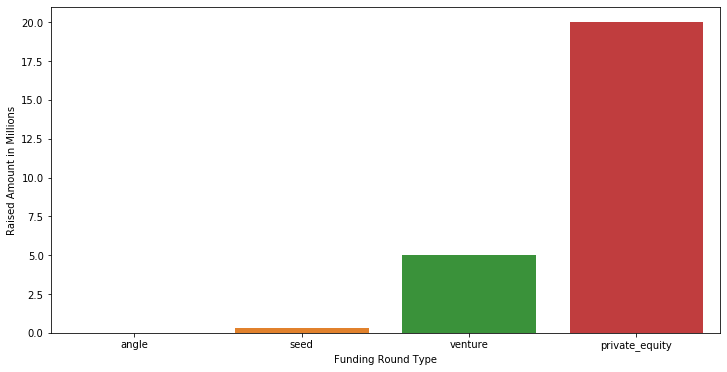

In [135]:
plt.figure(figsize=(12,6))
sns.barplot(x=master_frame.funding_round_type,y=master_frame.raised_amount_usd/1000000,estimator=np.median,order=["angle","seed","venture","private_equity"],ci=None)
plt.xlabel("Funding Round Type")
plt.ylabel("Raised Amount in Millions")
plt.show()

2. A plot showing the top 9 countries against the total amount of investments of funding type FT

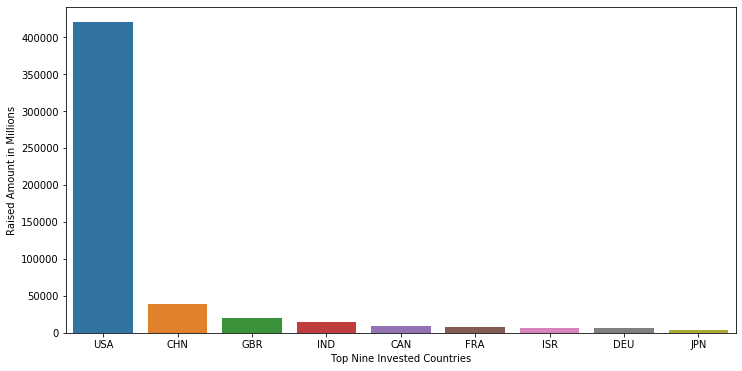

In [138]:
plt.figure(figsize=(12,6))
sns.barplot(x=top9.country_code,y=top9.raised_amount_usd/1000000,ci=None)
plt.xlabel("Top Nine Invested Countries")
plt.ylabel("Raised Amount in Millions")
plt.show()

Above top three english speaking countries are: USA, GBR and IND

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

For this we will create a single master data frame for all top 3 countries and its corresponding top 3 sectors and then plot it.

In [250]:
country_df = D1[D1['Main sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

In [251]:
country_df = country_df.append(D2[D2['Main sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])])

In [252]:
country_df = country_df.append(D3[D3['Main sector'].isin(['Others','News, Search and Messaging','Entertainment'])])

In [254]:
country_df = country_df.groupby(['country_code','Main sector']).size().to_frame(name = 'Number of Investment').reset_index()


In [255]:
#Checking DF
country_df

,country_code,Main sector,Number of Investment
0,GBR,Cleantech / Semiconductors,127
1,GBR,Others,143
2,GBR,"Social, Finance, Analytics, Advertising",98
3,IND,Entertainment,33
4,IND,"News, Search and Messaging",52
5,IND,Others,109
6,USA,Cleantech / Semiconductors,2297
7,USA,Others,2923
8,USA,"Social, Finance, Analytics, Advertising",1912


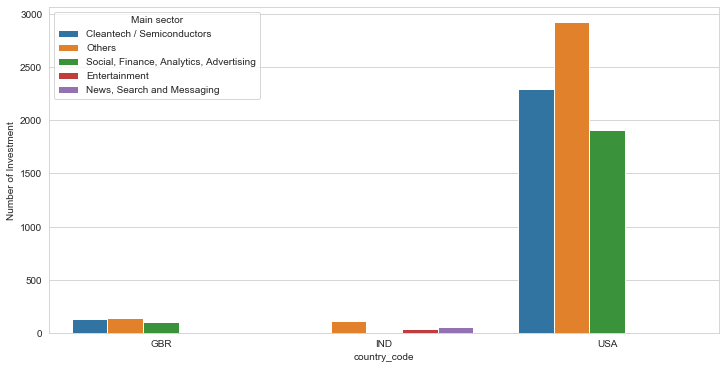

In [257]:
#Plotting Bar plot
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x = 'country_code', y = 'Number of Investment', hue = 'Main sector', data = country_df)
sns.set_style('darkgrid')